# About matrix/array multiplication

In earlier lecture, we discussed about matrix multiplications and mentioned there are two types of multiplications. One of them is the matrix multiplication and other is block multiplication (element-wise)


In [1]:
import numpy as np
A=np.matrix([[1,2,3],[4,5,6]])
B=np.matrix([[7,8],[9,10],[11,12]])

In [2]:
print("Matrix A is:\n",A)
print("Matrix B is:\n",B)

Matrix A is:
 [[1 2 3]
 [4 5 6]]
Matrix B is:
 [[ 7  8]
 [ 9 10]
 [11 12]]


The multiplication is calculated as follows:

![step1](images/matrix-multiply-a.svg)

![step2](images/matrix-multiply-b.svg)

![step3 and 4](images/matrix-multiply-c.svg)

[image source](https://www.mathsisfun.com/algebra/matrix-multiplying.html)

Here's Python equivalent for the matrix multiplication. We can use `*` operator or `np.dot()` function.

In [3]:
A * B

matrix([[ 58,  64],
        [139, 154]])

In [4]:
np.dot(A,B)

matrix([[ 58,  64],
        [139, 154]])

In [5]:
# alternative way to write multiplication
A.dot(B)

matrix([[ 58,  64],
        [139, 154]])

The elementwise multiplication (also known as Hadamard product) can be described as:

![Hadamard product](images/4eb9bb54b2820fb3583901ec05bc4b474b6d90bc.png)

An this can be achieved with `np.multiply()` function

In [6]:
C = np.matrix([[1,2],[3,4]])
D = np.matrix([[5,6],[7,8]])
print("Matrix C is:\n",C)
print("Matrix D is:\n",D)

Matrix C is:
 [[1 2]
 [3 4]]
Matrix D is:
 [[5 6]
 [7 8]]


In [7]:
np.multiply(C,D)

matrix([[ 5, 12],
        [21, 32]])

> Beware that there are some incompatibilities between matrix and 2D array objects, especially for `*` operator. 

In [8]:
C_arr = np.array([[1,2],[3,4]])
D_arr = np.array([[5,6],[7,8]])
C_arr * D_arr

array([[ 5, 12],
       [21, 32]])

The `*` operator performs elementwise multiplication in 2D array but performs matrix multiplication for `np.matrix` objects.

In [9]:
C * D

matrix([[19, 22],
        [43, 50]])

Use of `@` operator for matrix multiplication is safer way for both matrix and array objects

In [10]:
C @ D

matrix([[19, 22],
        [43, 50]])

In [11]:
C_arr @ D_arr

array([[19, 22],
       [43, 50]])

# Inverse of matrix

You must be wondering what is the use of inverse of a matrix. Here's an example. Let's assume we want to solve the equations below:

```
x  +  y +  z  = 6
     2y + 5z  = −4
2x + 5y −  z  = 27
```

The equations can be written as:

![linear equation to matrix](images/systems-linear-equations-matrices1.svg)

In that case, if we represent the first matrix as A, we can write:

$$ A\times X = B$$

and then we can find X as:

$$ X = A^{-1} \times B$$

Let's prepare matrices A and B.

In [12]:
A = np.matrix([[1,1,1],[0,2,5],[2,5,-1]])
A

matrix([[ 1,  1,  1],
        [ 0,  2,  5],
        [ 2,  5, -1]])

In [13]:
B= np.matrix([[6],[-4],[27]])
B

matrix([[ 6],
        [-4],
        [27]])

Then, the solution is:

In [14]:
A.I * B

matrix([[ 5.],
        [ 3.],
        [-2.]])

# Distance and correlation matrices 

When data is arranged as matrix or 2D array, then it's easy to calculate distance or correlation between rows and columns. In this example we'll be using a small 2D array in which expression values of 10 genes in 8 samples. In such an arrangement, we might wonder which genes have similar expression pattern. Or, which samples are similar to each other.

In [15]:
# this is necessary for fitting matrices to screen
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth = 150)

In [16]:
import numpy as np
import scipy
from scipy import spatial

Here's the sample values. In this example, Gene1 is expressed 5 units in Sample1, 11 units in Sample2 and 1650 units in Sample8.

In [17]:
gene_exp = np.array([[5, 11, 18, 9, 1500, 1480, 1530, 1650],
     [1045, 1225, 1560, 1308, 21, 26, 20, 28],
     [8375, 9545, 9012, 8798, 17, 18, 17, 18],
     [2645, 2078, 3815, 3311, 12, 13, 17, 16],
     [19, 15, 14, 21, 2564, 2486, 2299, 2389],
     [7346, 8145, 7778, 8214, 19, 16, 14, 12],
     [1120, 1125, 1298, 1101, 18, 17, 15, 13],
     [1548, 158, 1493, 1511, 19, 23, 1920, 18],
     [12, 17, 225, 93, 1545, 1398, 1473, 1579],
     [5, 3, 2, 5, 156, 1856, 158, 1758]])

In [18]:
gene_exp

array([[   5,   11,   18,    9, 1500, 1480, 1530, 1650],
       [1045, 1225, 1560, 1308,   21,   26,   20,   28],
       [8375, 9545, 9012, 8798,   17,   18,   17,   18],
       [2645, 2078, 3815, 3311,   12,   13,   17,   16],
       [  19,   15,   14,   21, 2564, 2486, 2299, 2389],
       [7346, 8145, 7778, 8214,   19,   16,   14,   12],
       [1120, 1125, 1298, 1101,   18,   17,   15,   13],
       [1548,  158, 1493, 1511,   19,   23, 1920,   18],
       [  12,   17,  225,   93, 1545, 1398, 1473, 1579],
       [   5,    3,    2,    5,  156, 1856,  158, 1758]])

In [19]:
gene_exp.shape

(10, 8)

There are various formulas/approaches to calculate distance between two points. In this example, we'll be using *Euclidean* distance. Here's the demonstration in 2D space.

![Euclidean distance](images/euclidean_distance.png)

[Image source](https://towardsdatascience.com/how-to-measure-distances-in-machine-learning-13a396aa34ce)

For 2D space the formula is:

![Euclidean 2D](images/euclidean_2d.png)

And for N dimensional space the formula becomes:

![Euclidean N dimension](images/euclidean_n.png)

Let's calculate pairwise distances between points using `SciPy` module

In [20]:
# An example
scipy.spatial.distance.pdist(gene_exp, 'euclidean')

array([ 3979.0830602 , 18121.31173508,  6774.05786807,  1811.62523718, 16028.40662699,  3824.4963067 ,  3737.08723473,   258.89959444,
        1960.12652653, 15316.13178972,  3519.23940646,  5463.50363778, 13188.8497224 ,   357.01260482,  2246.621686  ,  3808.74953233,
        3616.50743121, 12070.83348406, 18494.61454045,  2209.68459288, 15565.38020737, 15747.4082312 , 17958.47398862, 18056.81752137,
        7738.90379834,  9932.40912367,  3801.748019  ,  4140.41724951,  6576.87258505,  6573.86187868, 16451.01981641,  5357.18825505,
        5007.44515696,  1900.0628937 ,  3343.37344609, 13439.81580975, 13618.85927675, 15864.21003391, 15953.36713675,  2225.64260383,
        3666.0238679 ,  3442.29284054,  3585.18562978,  4050.54230937,  1989.48963305])

The distances are better visualized in square form. The code below converts pairwise distances in N x N matrix, where each row and column represents a gene.

In [21]:
pairwise_dist = scipy.spatial.distance.pdist(gene_exp, 'euclidean')
dist_matrix = scipy.spatial.distance.squareform(pairwise_dist)
np.round(dist_matrix)

array([[    0.,  3979., 18121.,  6774.,  1812., 16028.,  3824.,  3737.,   259.,  1960.],
       [ 3979.,     0., 15316.,  3519.,  5464., 13189.,   357.,  2247.,  3809.,  3617.],
       [18121., 15316.,     0., 12071., 18495.,  2210., 15565., 15747., 17958., 18057.],
       [ 6774.,  3519., 12071.,     0.,  7739.,  9932.,  3802.,  4140.,  6577.,  6574.],
       [ 1812.,  5464., 18495.,  7739.,     0., 16451.,  5357.,  5007.,  1900.,  3343.],
       [16028., 13189.,  2210.,  9932., 16451.,     0., 13440., 13619., 15864., 15953.],
       [ 3824.,   357., 15565.,  3802.,  5357., 13440.,     0.,  2226.,  3666.,  3442.],
       [ 3737.,  2247., 15747.,  4140.,  5007., 13619.,  2226.,     0.,  3585.,  4051.],
       [  259.,  3809., 17958.,  6577.,  1900., 15864.,  3666.,  3585.,     0.,  1989.],
       [ 1960.,  3617., 18057.,  6574.,  3343., 15953.,  3442.,  4051.,  1989.,     0.]])

Actually, there's better method to reveal patterns. As you can see gene1, gene5, gene9 and gene10 are expressed low in first 4 samples and highly expressed in last 4 samples. Remaining genes show the opposite pattern. Correlation calculations can assign values between 1 and -1 for each pair. If two genes have similar pattern they get higher score and if they have opposite pattern then they get smaller (minus) values. The absolute value increases as similarity increases.

Let's calculate Spearman correlation in our 2D array. Let's view the original data again:

In [22]:
gene_exp

array([[   5,   11,   18,    9, 1500, 1480, 1530, 1650],
       [1045, 1225, 1560, 1308,   21,   26,   20,   28],
       [8375, 9545, 9012, 8798,   17,   18,   17,   18],
       [2645, 2078, 3815, 3311,   12,   13,   17,   16],
       [  19,   15,   14,   21, 2564, 2486, 2299, 2389],
       [7346, 8145, 7778, 8214,   19,   16,   14,   12],
       [1120, 1125, 1298, 1101,   18,   17,   15,   13],
       [1548,  158, 1493, 1511,   19,   23, 1920,   18],
       [  12,   17,  225,   93, 1545, 1398, 1473, 1579],
       [   5,    3,    2,    5,  156, 1856,  158, 1758]])

In [23]:
from scipy.stats import spearmanr
gene_correlation = spearmanr(gene_exp, axis=1)[0]
np.round(gene_correlation, 2)

array([[ 1.  , -0.64, -0.67, -0.64,  0.6 , -0.83, -0.76, -0.48,  0.95,  0.63],
       [-0.64,  1.  ,  0.92,  0.83, -0.79,  0.76,  0.76,  0.1 , -0.6 , -0.77],
       [-0.67,  0.92,  1.  ,  0.75, -0.84,  0.77,  0.8 ,  0.12, -0.72, -0.76],
       [-0.64,  0.83,  0.75,  1.  , -0.9 ,  0.67,  0.69,  0.6 , -0.67, -0.78],
       [ 0.6 , -0.79, -0.84, -0.9 ,  1.  , -0.62, -0.79, -0.5 ,  0.71,  0.85],
       [-0.83,  0.76,  0.77,  0.67, -0.62,  1.  ,  0.83,  0.31, -0.76, -0.8 ],
       [-0.76,  0.76,  0.8 ,  0.69, -0.79,  0.83,  1.  ,  0.29, -0.76, -0.92],
       [-0.48,  0.1 ,  0.12,  0.6 , -0.5 ,  0.31,  0.29,  1.  , -0.57, -0.35],
       [ 0.95, -0.6 , -0.72, -0.67,  0.71, -0.76, -0.76, -0.57,  1.  ,  0.65],
       [ 0.63, -0.77, -0.76, -0.78,  0.85, -0.8 , -0.92, -0.35,  0.65,  1.  ]])

Looks like, *Gene1* and *Gene9* has the highest correlation, 0.95 on the other hand *Gene10* and *Gene7* has the highest negative correlation, -0.92

By changing the axis on which correlation is calculated, we can measure correlation between samples.

In [24]:
sample_correlation = spearmanr(gene_exp, axis=0)[0]
np.round(sample_correlation, 2)

array([[ 1.  ,  0.94,  0.92,  0.97, -0.79, -0.81, -0.59, -0.79],
       [ 0.94,  1.  ,  0.98,  0.96, -0.76, -0.83, -0.71, -0.79],
       [ 0.92,  0.98,  1.  ,  0.98, -0.77, -0.83, -0.65, -0.78],
       [ 0.97,  0.96,  0.98,  1.  , -0.76, -0.82, -0.58, -0.78],
       [-0.79, -0.76, -0.77, -0.76,  1.  ,  0.89,  0.71,  0.81],
       [-0.81, -0.83, -0.83, -0.82,  0.89,  1.  ,  0.79,  0.96],
       [-0.59, -0.71, -0.65, -0.58,  0.71,  0.79,  1.  ,  0.81],
       [-0.79, -0.79, -0.78, -0.78,  0.81,  0.96,  0.81,  1.  ]])

Notice the use of `axis=0` or `axis=1` arguments, which allow correlation calculation between samples or genes, respectively.

# Images as 2D arrays

Let's see a fun application of numpy and let's see how much it's easy to handle and manipulate images with matplotlib and numpy.

As you might have guessed images are 2D arrays of pixels. Let's consider the image below, this is extremely zoomed in 4x4 pixel image. 

![test image zoom](images/test_image_zoom.png)

Let's import this image. Apart from `matplotlib` library, CV (computer vision) library has efficient functions to read images.

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

test = cv2.imread("images/test_image.png",1)
test

array([[[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]]], dtype=uint8)

To understand how color is represented in three 8 bit channels please visit [this site](https://www.rapidtables.com/web/color/RGB_Color.html).

When printed as list or array, it gives the b,g,r values (instead of R, G, B order as usual) for each pixel.

In [26]:
test.tolist()

[[[255, 255, 255], [0, 0, 0], [0, 0, 0], [0, 255, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 255], [0, 0, 0], [0, 0, 0], [255, 0, 0]]]

In [27]:
test.shape

(4, 4, 3)

We also have access the separate channels which is contolled by the third dimension. 

In [28]:
test[:,:,0]

array([[255,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0, 255]], dtype=uint8)

In [29]:
test[:,:,1]

array([[255,   0,   0, 255],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=uint8)

In [30]:
test[:,:,2]

array([[255,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [255,   0,   0,   0]], dtype=uint8)

Let's try to visualize the arrangement of arrays for each color channel

![color layers](images/color-rgb-array.png)

What do you think will happen if we reset (=0) first two layers?

In [31]:
only_red=test.copy()
only_red[:,:,0:2] = 0

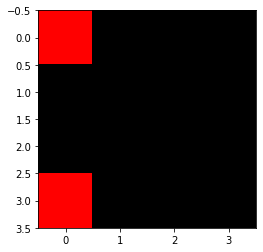

In [32]:
plt.imshow(cv2.cvtColor(only_red, cv2.COLOR_BGR2RGB))

When green and blue channels are reset, only red channel is left. As you expect, now the white pixel is red because when we remove blue and green from white, only red color remains.

Let's remove blue channel this time, which means resetting first layer of 3D array.

In [33]:
no_blue=test.copy()
no_blue[:,:,0] = 0

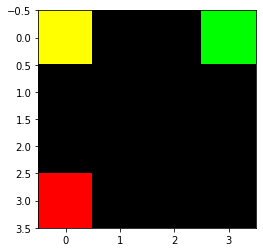

In [34]:
plt.imshow(cv2.cvtColor(no_blue, cv2.COLOR_BGR2RGB))

When blue is removed from white, red and green left, and mixture of red and green gives yellow color. 

## Detection and counting of cells

Let's use a more sophisticated example. Counting cells under microscope is a tiring and tedious process. Can we automate cell counting from images?

This example will demonstrate cell counting from gray image. You can also check another example, blue-white bacteria colony counting [here](http://www.sixthresearcher.com/counting-blue-and-white-bacteria-colonies-with-python-and-opencv/).

Let's import sample cell culture image.

In [35]:
img = cv2.imread("images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png",0)

img[:10,:10]

array([[3, 2, 3, 3, 3, 2, 3, 2, 3, 3],
       [2, 3, 3, 2, 2, 2, 3, 2, 3, 3],
       [3, 3, 3, 2, 3, 2, 3, 3, 3, 3],
       [2, 3, 2, 3, 3, 2, 3, 2, 3, 3],
       [3, 3, 3, 2, 2, 3, 3, 3, 3, 3],
       [3, 3, 2, 3, 3, 3, 3, 3, 3, 3],
       [2, 3, 3, 2, 3, 2, 2, 3, 3, 3],
       [3, 3, 3, 3, 3, 2, 2, 3, 2, 2],
       [3, 2, 3, 3, 2, 3, 2, 3, 2, 2],
       [3, 2, 3, 3, 2, 2, 2, 2, 2, 2]], dtype=uint8)

In [36]:
img.shape

(256, 256)

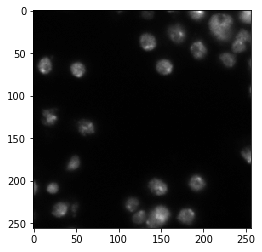

In [37]:
plt.imshow(img, 'gray')

In [38]:
cell= img[55:80, 140:170]
#cell

In [39]:
print(cell)

[[  5   5   5   6   7   8   7   8   8  10  10  11  10  11  11  11  10  11  10   9   8   8   7   6   6   6   5   5   5   4]
 [  5   5   5   6   7   8   9   9  11  11  13  15  14  15  16  14  13  12  12  11  11   9   8   7   6   6   6   5   5   5]
 [  5   6   6   7   7   9  10  11  13  15  19  20  23  24  24  23  21  17  16  13  12  10   9   8   7   6   5   5   4   4]
 [  5   6   7   8   9  11  13  15  17  22  26  30  32  35  33  34  30  27  24  21  16  13  10   9   8   7   6   6   5   5]
 [  6   6   7   9  11  12  17  22  25  29  32  39  41  44  44  44  41  40  36  31  23  17  14  11   8   7   6   5   5   4]
 [  6   6   8  10  12  17  23  28  33  36  42  46  51  51  52  50  48  46  44  39  30  23  15  12  10   8   6   5   5   5]
 [  6   7   8  11  14  21  28  34  40  44  48  51  54  56  60  61  63  60  56  47  38  30  22  15  11   9   7   6   5   5]
 [  6   7   9  11  15  21  30  40  46  49  49  51  53  55  60  68  68  65  62  58  48  34  27  17  13   9   7   6   5   5]
 [  6   7   9  1

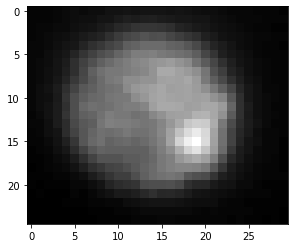

In [40]:
plt.imshow(cell, 'gray')

In [41]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(cell,(5,5),0)
print(blur)

[[ 5  5  5  6  7  8  8  9 10 11 13 13 14 14 14 14 13 12 12 11 10  9  8  7  6  6  6  5  5  5]
 [ 5  5  6  6  7  8  9 10 11 13 14 16 17 17 17 17 15 14 13 12 11  9  8  7  7  6  6  5  5  5]
 [ 5  6  6  7  8  9 11 12 14 17 19 21 23 24 24 23 22 20 18 15 13 11  9  8  7  6  6  5  5  5]
 [ 6  6  7  8  9 11 14 16 19 22 26 29 32 33 33 33 31 28 25 22 18 14 11  9  8  7  6  5  5  5]
 [ 6  6  8  9 11 14 18 22 25 29 33 37 40 42 43 42 40 38 34 29 24 18 14 11  9  7  6  5  5  5]
 [ 6  7  8 10 13 17 22 28 32 36 40 44 47 50 51 51 50 47 44 38 31 24 18 13 10  8  7  6  5  5]
 [ 7  7  9 11 15 20 27 33 38 42 46 49 52 54 57 58 58 56 52 46 38 30 22 16 12  9  7  6  5  5]
 [ 7  7  9 12 17 23 30 36 42 46 49 52 55 57 60 63 64 62 59 53 45 36 27 20 14 10  8  6  5  5]
 [ 7  8 10 13 19 25 32 38 44 47 50 54 57 59 62 64 65 65 63 58 51 42 33 24 17 12  8  7  6  5]
 [ 7  8 10 15 21 28 35 40 44 47 50 54 57 61 63 65 66 65 64 62 56 49 40 30 20 13  9  7  6  5]
 [ 7  8 11 15 22 31 37 42 45 47 50 52 56 60 63 65 66 66 65 64 62 57 48

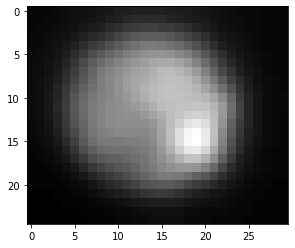

In [42]:
plt.imshow(blur, 'gray')

In [43]:
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # cv2.THRESH_BINARY+cv2.THRESH_OTSU neyi hesaplar?

# ret3 == 30
print(th3)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0]
 [  0   0   0   

(Text(0.5, 1.0, "Otsu's Thresholding"),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

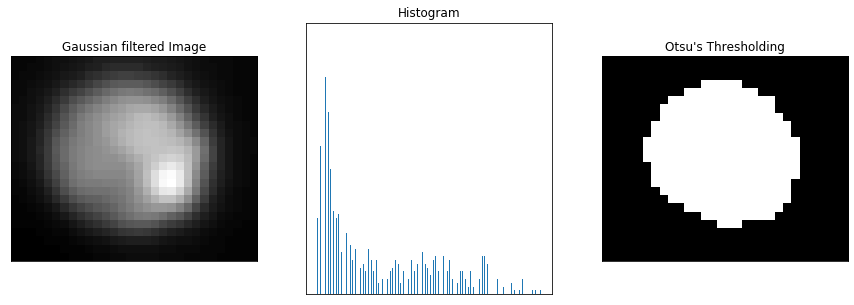

In [44]:
plt.figure(figsize=(15,5))
images = [blur, 0, th3]
titles = ['Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.subplot(1,3,1),plt.imshow(images[0],'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.hist(images[0].ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(images[2],'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])

In [45]:
# cell.ravel()

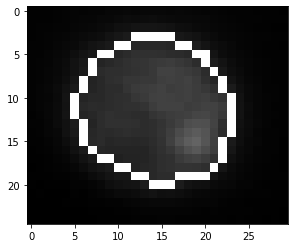

In [46]:
image, contours = cv2.findContours(th3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cell_contour = cv2.drawContours(cell.copy(), image, -1, (255,255,255), 1) # You must work on copy of cell matrice object because of overwrite problem
plt.imshow(cell_contour, 'gray')

number of detected contours:  1


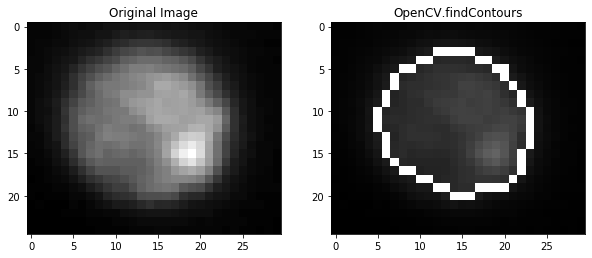

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.title('Original Image'),plt.imshow(cell, 'gray')#,'red')
plt.subplot(1,2,2),plt.title('OpenCV.findContours'),plt.imshow(cell_contour,'gray')#,'red')

print('number of detected contours: ',len(image))

## Count cells in whole image

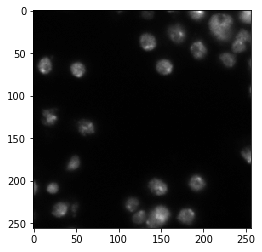

In [48]:
img = cv2.imread("images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png",0)
plt.imshow(img, 'gray')

In [49]:
blur_cells = cv2.GaussianBlur(img,(5,5),0)
#print(blur)

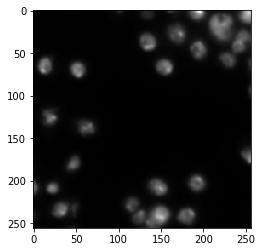

In [50]:
plt.imshow(blur_cells, 'gray')

In [51]:
ret3_cells,th3_cells = cv2.threshold(blur_cells,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # cv2.THRESH_BINARY+cv2.THRESH_OTSU neyi hesaplar?

# ret3_cells == 24
# print(th3_cells)

(Text(0.5, 1.0, "Otsu's Thresholding"),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

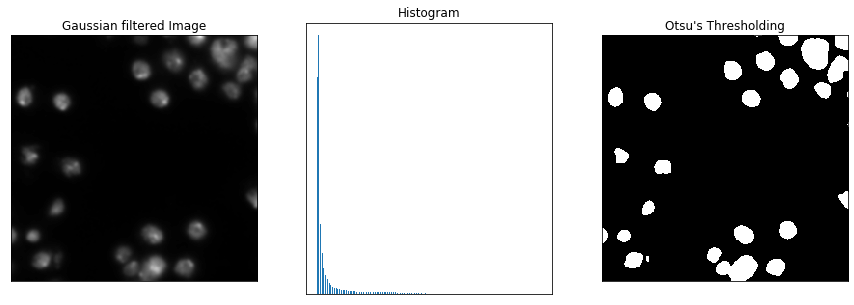

In [52]:
plt.figure(figsize=(15,5))
images = [blur_cells, 0, th3_cells]
titles = ['Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.subplot(1,3,1),plt.imshow(images[0],'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.hist(images[0].ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(images[2],'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])

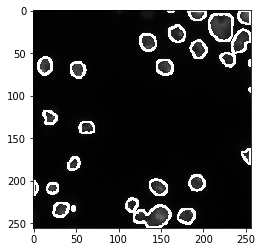

In [53]:
image_cells, contours_cells = cv2.findContours(th3_cells,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cells_contour = cv2.drawContours(img.copy(), image_cells, -1, (255,255,255), 2) # width = 2.
plt.imshow(cells_contour, 'gray')

number of detected contours:  27


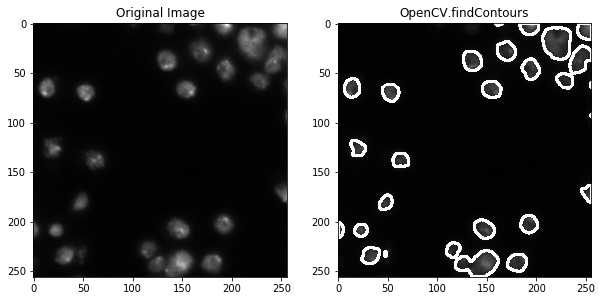

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.title('Original Image'),plt.imshow(img, 'gray')#,'red')
plt.subplot(1,2,2),plt.title('OpenCV.findContours'),plt.imshow(cells_contour,'gray')#,'red')

print('number of detected contours: ',len(image_cells))

## Videos are frames of images

In [55]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

vidcap = cv2.VideoCapture('cell division animation-ta4mGgoMp1Q.mp4')
#success,image = vidcap.read()
count = 0
test=np.zeros(shape=(346,360,640,3)).astype('uint8')
success = True
while success:
    #cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
    success,frame = vidcap.read()
    if not(success): break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
    #print('Read a new frame: ', frame.shape)
    test[count]=gray
    count += 1

(360, 640, 3)


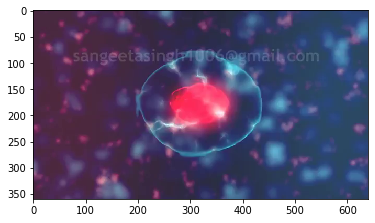

In [56]:
print(test[1].shape)
plt.imshow(test[1])

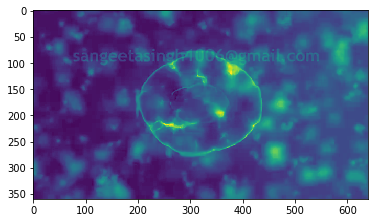

In [57]:
plt.imshow(test[1][:,:,2])

In [58]:
test_frame = np.round(test[1][:,:,2],1)
blur_frame = cv2.GaussianBlur(test_frame,(5,5),0)
ret3_frame,th3_frame = cv2.threshold(blur_frame,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [59]:
blur_frame[-10:,-10:]

array([[105, 107, 110, 111, 112, 112, 113, 113, 113, 113],
       [103, 105, 107, 109, 109, 110, 111, 111, 112, 112],
       [100, 102, 104, 106, 106, 107, 108, 109, 109, 109],
       [ 98, 100, 102, 103, 103, 104, 106, 107, 107, 108],
       [ 97,  98, 100, 101, 101, 102, 104, 105, 106, 106],
       [ 96,  97,  98,  98,  99, 100, 101, 103, 104, 104],
       [ 95,  95,  96,  96,  97,  98,  99, 100, 101, 102],
       [ 94,  94,  95,  95,  96,  97,  98,  99,  99, 100],
       [ 94,  94,  94,  95,  96,  97,  97,  98,  98,  99],
       [ 93,  93,  94,  95,  96,  97,  97,  98,  98,  98]], dtype=uint8)

In [60]:
tmp=np.zeros(shape=(346,360,640,3)).astype('uint8')
type(tmp)

numpy.ndarray

In [61]:
from sys import getsizeof
getsizeof(tmp)

239155344

In [62]:
tmp.nbytes

239155200

In [63]:
(346*360*640*3)

239155200

In [64]:
tmp_view = tmp[:,:,:,:]
getsizeof(tmp_view)

144

## Broadcasting

## Numba



In [65]:
import numba